# &#x1F4D1; &nbsp;  $\mathfrak {\color{#228B22} { OpenCV \ Cookbook}}$

## 0. Code Library and Links

- [OpenCV-Python Tutorials » Feature Detection and Description](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_table_of_contents_feature2d/py_table_of_contents_feature2d.html)
- [Local Invariant Feature Detectors: A Survey](http://campar.in.tum.de/twiki/pub/Chair/TeachingWs09MATDCV/FT_survey_interestpoints08.pdf)
- [OpenCV Getting Started](https://github.com/handee/opencv-gettingstarted)

In [486]:
import cv2 
import common 
import numpy as np
import scipy as sp

import scipy.ndimage
import scipy.misc
import scipy.special
import scipy.interpolate

import matplotlib.pylab as plt
from matplotlib import cm
import matplotlib.patches as patches
import pylab 
%matplotlib inline

## 1. Image Data

Image size 47817
Image shape (99, 161, 3)
Image type uint8


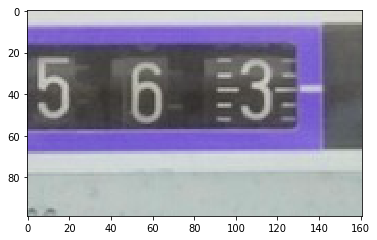

In [663]:
pylab.rcParams['figure.figsize'] = (6, 4)
digit_image = cv2.imread('new/10.png')

print ('Image size', digit_image.size)
print ('Image shape', digit_image.shape)
print ('Image type', digit_image.dtype)

plt.imshow(digit_image);

In [664]:
for i in range(0,3):
    min_value, max_value, min_location, max_location = cv2.minMaxLoc(digit_image[:,:,i])
    print ("min {} is at {}, and max {} is at {}".format(min_value, min_location, max_value, max_location))

min 50.0 is at (79, 46), and max 224.0 is at (112, 0)
min 46.0 is at (79, 46), and max 224.0 is at (143, 4)
min 43.0 is at (79, 47), and max 243.0 is at (132, 38)


Image size 178506
Image shape (211, 282, 3)
Image type uint8


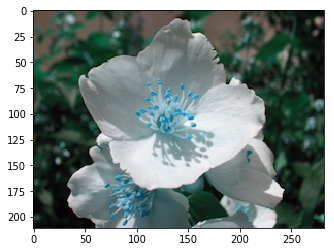

In [667]:
flower_image = cv2.imread('flower.png')

print ('Image size', flower_image.size)
print ('Image shape', flower_image.shape)
print ('Image type', flower_image.dtype)

plt.imshow(flower_image);

Image size 248832
Image shape (384, 216, 3)
Image type uint8


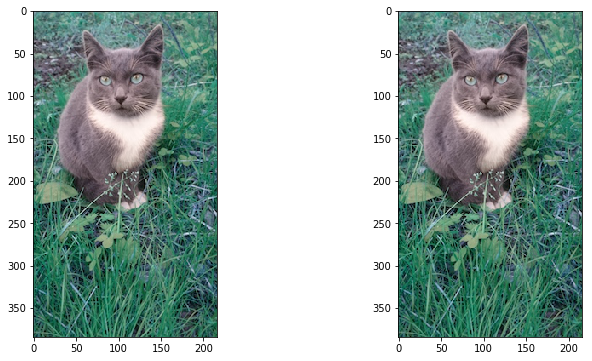

In [493]:
pylab.rcParams['figure.figsize'] = (12, 6)
cat_image = cv2.imread('cat.png')
normalized_cat_image = cat_image/255

print ('Image size', cat_image.size)
print ('Image shape', cat_image.shape)
print ('Image type', cat_image.dtype)

plt.figure(1)
plt.subplot(121)
plt.imshow(cat_image)
plt.subplot(122)
plt.imshow(normalized_cat_image);

In [494]:
for i in range(0,3):
    min_value, max_value, min_location, max_location = cv2.minMaxLoc(normalized_cat_image[:,:,i])
    print ("min {} is at {}, and max {} is at {}".format(min_value, min_location, max_value, max_location))

min 0.0 is at (16, 90), and max 1.0 is at (74, 119)
min 0.0 is at (168, 184), and max 0.9647058823529412 is at (125, 144)
min 0.0 is at (17, 157), and max 0.9607843137254902 is at (181, 262)


## 2. Processing
### Color Flags

In [495]:
ColorFlags = [flag for flag in dir(cv2) if flag.startswith('COLOR') ]
print (ColorFlags[:50])

['COLORMAP_AUTUMN', 'COLORMAP_BONE', 'COLORMAP_COOL', 'COLORMAP_HOT', 'COLORMAP_HSV', 'COLORMAP_JET', 'COLORMAP_OCEAN', 'COLORMAP_PARULA', 'COLORMAP_PINK', 'COLORMAP_RAINBOW', 'COLORMAP_SPRING', 'COLORMAP_SUMMER', 'COLORMAP_WINTER', 'COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGB_EA', 'COLOR_BAYER_GR2RGB_VNG', 'COLOR_BAYER_RG2BGR', 'COLOR_BAYER_RG2BGR_EA', 'COLOR_BAYER_RG2BGR_VNG', 'COLOR_BAYER_RG2GRAY', 'COLOR_BAYER_RG2RGB', 'COLOR_BAYER_RG2RGB_EA', 'COLOR_BAYER_RG2RGB_VNG', 'COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS'

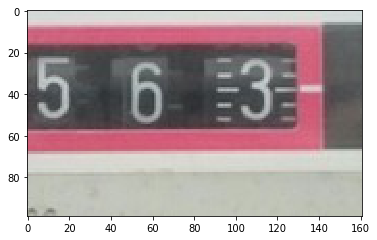

In [496]:
pylab.rcParams['figure.figsize'] = (6, 4)
flag_image = cv2.cvtColor(digit_image, cv2.COLOR_BGR2RGB)
plt.imshow(flag_image);

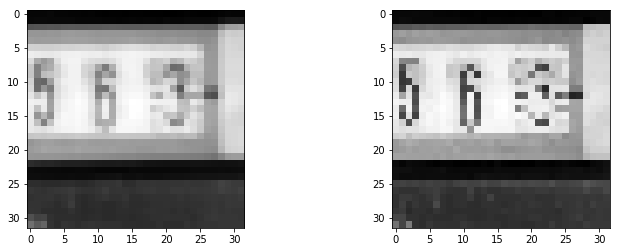

In [504]:
pylab.rcParams['figure.figsize'] = (12, 4)
scipy_image = scipy.ndimage.imread('new/10.png', mode='RGB')

gray_scipy_image = np.dot(np.array(scipy_image, dtype='float32'), [0.299, 0.587, 0.114])
resized_scipy_image = scipy.misc.imresize(gray_scipy_image, (32, 32, 3))

gray_image = cv2.cvtColor(digit_image, cv2.COLOR_BGR2GRAY)
resized_image = cv2.resize(gray_image, (32, 32), interpolation = cv2.INTER_CUBIC)

plt.figure(1)
plt.subplot(121)
plt.imshow(resized_scipy_image, cmap=plt.cm.Greys)

plt.subplot(122)
plt.imshow(resized_image, cmap=plt.cm.Greys); 

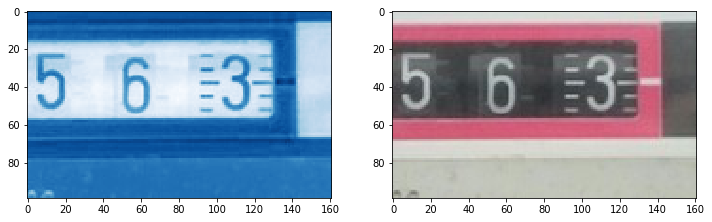

In [505]:
# split channels
b, g, r = cv2.split(flag_image)
# merge channels
merged_image = cv2.merge([b, g, r])
# display one of the channels
plt.figure(1)
plt.subplot(121)
plt.imshow(b, cmap=cm.Blues);
# display merged image
plt.subplot(122)
plt.imshow(merged_image);

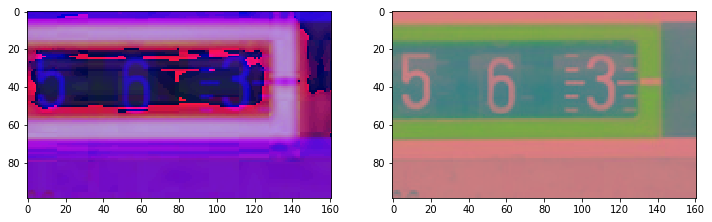

In [506]:
hsv_image = cv2.cvtColor(flag_image,cv2.COLOR_BGR2HSV_FULL)
lab_image = cv2.cvtColor(flag_image, cv2.COLOR_BGR2LAB)

plt.figure(1)
plt.subplot(121)
plt.imshow(hsv_image, cmap=cm.Blues);
plt.subplot(122)
plt.imshow(lab_image);

### Transformations

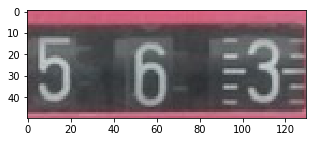

In [507]:
pylab.rcParams['figure.figsize'] = (5, 2)
box_image = flag_image[10:60, :130]
plt.imshow(box_image);

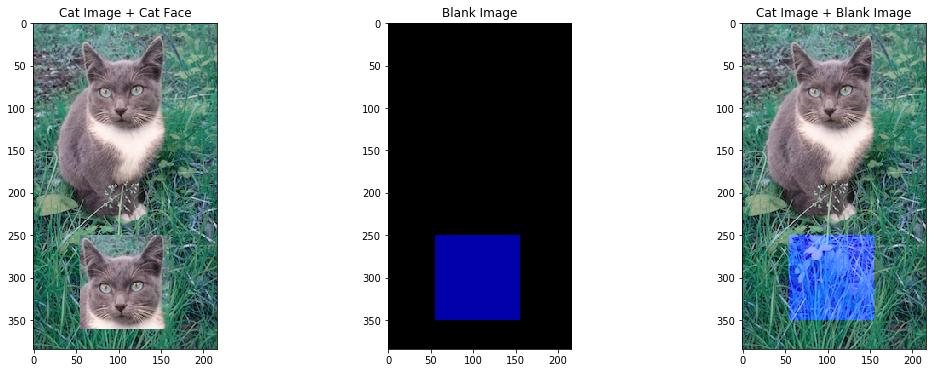

In [510]:
pylab.rcParams['figure.figsize'] = (18, 6)

twice_image = cv2.imread('cat.png')
cat_face_image = twice_image[20:130, 55:160]

blank_image = np.zeros((cat_image.shape), np.uint8)
blank_image[250:350, 55:155, 2] = 170

blank_cat_image = cv2.add(blank_image, twice_image)
twice_image[250:250 + cat_face_image.shape[0], 
            55:55 + cat_face_image.shape[1]] = cat_face_image 

plt.figure(1)
plt.subplot(131)
plt.imshow(twice_image)
plt.title('Cat Image + Cat Face')
plt.subplot(132)
plt.imshow(blank_image)
plt.title('Blank Image')
plt.subplot(133)
plt.imshow(blank_cat_image)
plt.title('Cat Image + Blank Image');

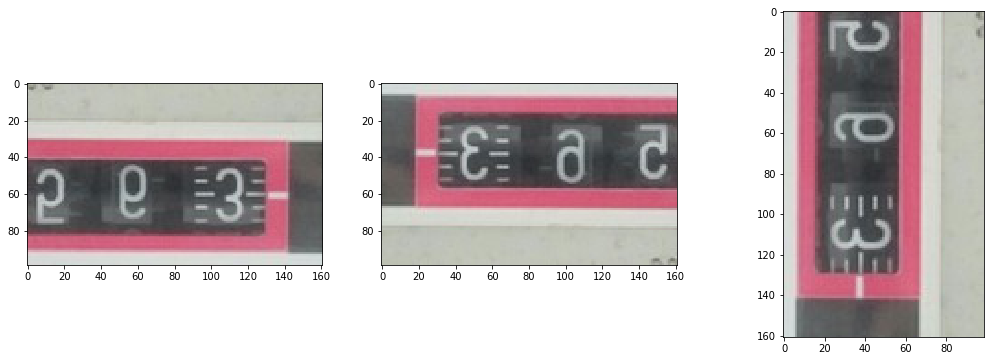

In [511]:
# flip images
vertical_flipped_image = cv2.flip(flag_image, 0)
horizontal_flipped_image = cv2.flip(flag_image, 1)
transposed_image = cv2.transpose(flag_image)

plt.figure(1)
plt.subplot(131)
plt.imshow(vertical_flipped_image)
plt.subplot(132)
plt.imshow(horizontal_flipped_image)
plt.subplot(133)
plt.imshow(transposed_image);

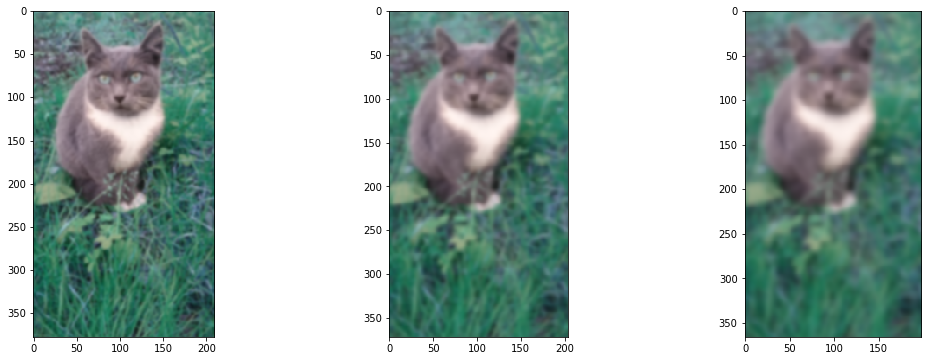

In [512]:
blur_image_3 = cv2.GaussianBlur(cat_image, (2*3+1, 2*3+1), -1)[3:-3, 3:-3]
blur_image_6 = cv2.GaussianBlur(cat_image, (2*6+1, 2*6+1), -1)[6:-6, 6:-6]
blur_image_9 = cv2.GaussianBlur(cat_image, (2*9+1, 2*9+1), -1)[9:-9, 9:-9]

plt.figure(1)
plt.subplot(131)
plt.imshow(blur_image_3)
plt.subplot(132)
plt.imshow(blur_image_6)
plt.subplot(133)
plt.imshow(blur_image_9);

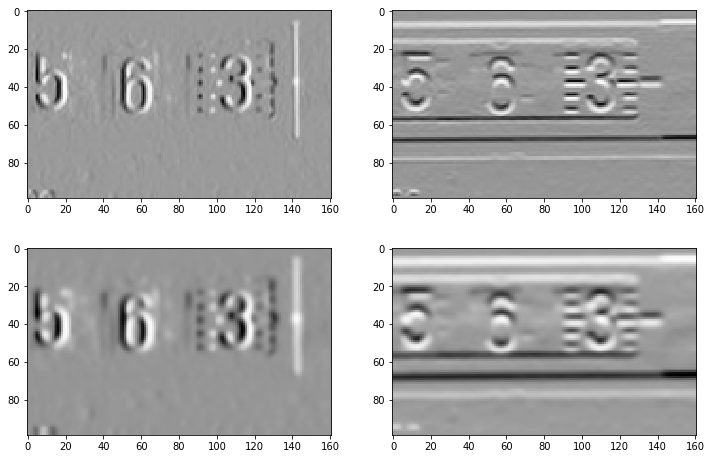

In [513]:
pylab.rcParams['figure.figsize'] = (12, 8)
sobel_image=cv2.cvtColor(digit_image,cv2.COLOR_BGR2GRAY)

sobelx_3 = cv2.Sobel(sobel_image,cv2.CV_64F, 1, 0, ksize=3)
sobely_3 = cv2.Sobel(sobel_image,cv2.CV_64F, 0, 1, ksize=3)
sobelx_11 = cv2.Sobel(sobel_image,cv2.CV_64F, 1, 0, ksize=11)
sobely_11 = cv2.Sobel(sobel_image,cv2.CV_64F, 0, 1, ksize=11)

plt.figure(1)
plt.subplot(221)
plt.imshow(sobelx_3, cmap = cm.Greys)
plt.subplot(222)
plt.imshow(sobely_3, cmap = cm.Greys)

plt.subplot(223)
plt.imshow(sobelx_11, cmap = cm.Greys)
plt.subplot(224)
plt.imshow(sobely_11, cmap = cm.Greys);

### Edges

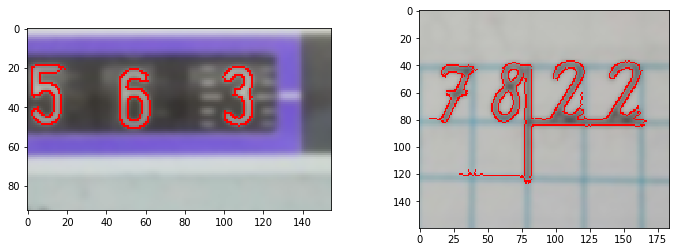

In [514]:
pylab.rcParams['figure.figsize'] = (12, 4)
edge_image = flag_image.copy()
edge_image2 = cv2.imread('new/24.png')

edge_image = cv2.GaussianBlur(edge_image, (2*3+1, 2*3+1), -1)[3:-3, 3:-3]
gray_edge_image = cv2.cvtColor(edge_image, cv2.COLOR_BGR2GRAY)
edge_image2 = cv2.GaussianBlur(edge_image2, (2*5+1, 2*5+1), -1)[5:-5, 5:-5]
gray_edge_image2 = cv2.cvtColor(edge_image2, cv2.COLOR_BGR2GRAY)

edge = cv2.Canny(gray_edge_image, 90, 240)
edge_image[edge!=0] = (0, 0, 255) 
edge2 = cv2.Canny(gray_edge_image2, 40, 120)
edge_image2[edge2!=0] = (0, 0, 255) 

plt.figure(1)
plt.subplot(121)
plt.imshow(cv2.cvtColor(edge_image, cv2.COLOR_BGR2RGB))
plt.subplot(122)
plt.imshow(cv2.cvtColor(edge_image2, cv2.COLOR_BGR2RGB));

### Corners

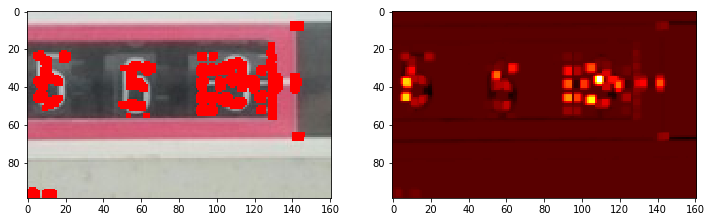

In [266]:
# http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html
harris_image = digit_image.copy()
gray_harris_image = cv2.cvtColor(harris_image, cv2.COLOR_BGR2GRAY)
gray_harris = np.float32(gray_harris_image)

detector = cv2.cornerHarris(gray_harris_image, 4, 3, 0.05) 
detector = cv2.dilate(detector, None)
harris_image[detector>0.01*detector.max()] = [0, 0, 255]

plt.figure(1)
plt.subplot(121)
plt.imshow(cv2.cvtColor(harris_image, cv2.COLOR_BGR2RGB))
plt.subplot(122)
plt.imshow(detector, cmap=cm.hot);

### Key Points

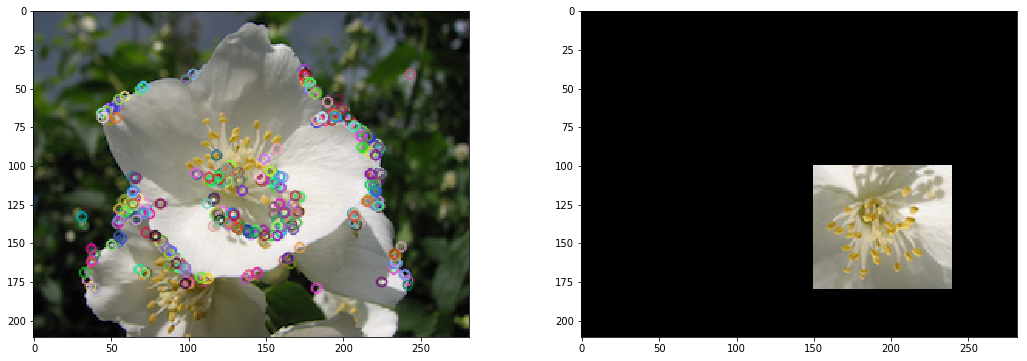

In [698]:
pylab.rcParams['figure.figsize'] = (18, 6)
orb_image = flower_image.copy()
orb = cv2.ORB_create()

keypoints = orb.detect(orb_image, None)
keypoints, descriptors = orb.compute(orb_image, keypoints)
cv2.drawKeypoints(orb_image, keypoints, orb_image)

match_image = np.zeros(flower_image.shape, np.uint8)
center_image = flower_image[60:140, 90:180] 
match_image[60:140, 100:180] = [0,0,0] 
center_image = cv2.flip(center_image, 0)
match_image[100:100+center_image.shape[0], 150:150+center_image.shape[1]] = center_image

plt.figure(1)
plt.subplot(121)
plt.imshow(cv2.cvtColor(orb_image, cv2.COLOR_BGR2RGB))
plt.subplot(122)
plt.imshow(cv2.cvtColor(match_image, cv2.COLOR_BGR2RGB));

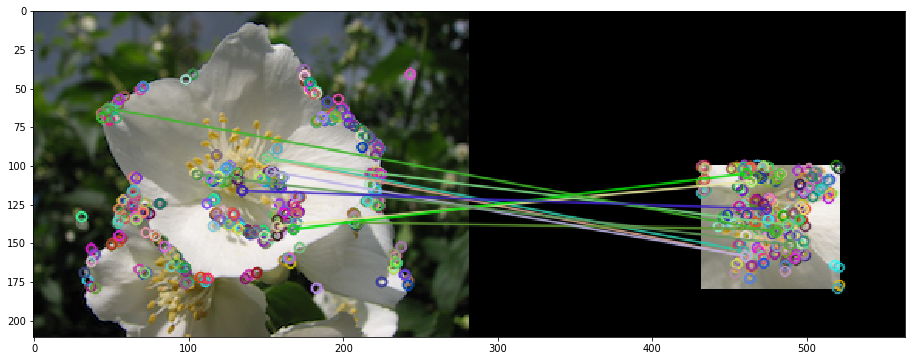

In [701]:
match_keypoints = orb.detect(match_image, None)
match_keypoints, match_descriptors = orb.compute(match_image, match_keypoints)

brute_force = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = brute_force.match(descriptors, match_descriptors)
matches = sorted(matches, key = lambda x:x.distance)
 
draw_matches = cv2.drawMatches(orb_image, keypoints, 
                               match_image, match_keypoints, 
                               matches[:10], orb_image)
 
plt.imshow(cv2.cvtColor(draw_matches, cv2.COLOR_BGR2RGB));

### Contours

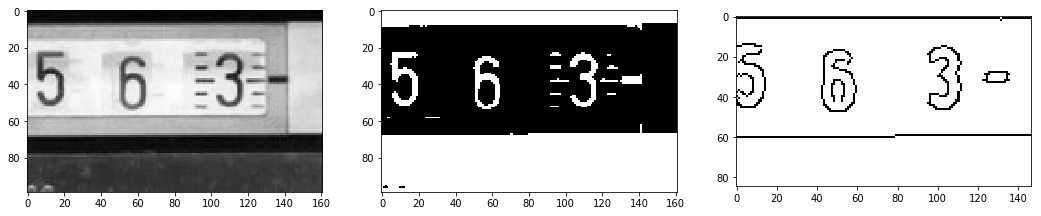

In [515]:
pylab.rcParams['figure.figsize'] = (18, 4)
k=7
gray_image = cv2.cvtColor(flag_image, cv2.COLOR_BGR2GRAY)
ret, thresh_image = cv2.threshold(gray_image, 140, 210, cv2.THRESH_BINARY_INV)

blur_image = cv2.GaussianBlur(thresh_image, (2*k+1, 2*k+1), -1)[k:-k, k:-k]
edges = cv2.Canny(blur_image, 50, 150)

plt.figure(1)
plt.subplot(131)
plt.imshow(gray_image, cmap=cm.Greys)
plt.subplot(132)
plt.imshow(thresh_image, cmap=cm.Greys)
plt.subplot(133)
plt.imshow(edges, cmap=cm.Greys);

In [477]:
gray_image2, contours, hierarchy = cv2.findContours(thresh_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(contours[0], contours[1])

[[[10 96]]

 [[12 96]]] [[[ 2 95]]

 [[ 1 96]]

 [[ 3 96]]]


In [478]:
# number of contours
len(contours)

3

In [479]:
# contour areas
contour_areas = [cv2.contourArea(cnt) for cnt in contours]
max_n = np.argmax(contour_areas)
contour_areas, max_n

([0.0, 1.0, 9338.0], 2)

In [480]:
contour = contours[max_n]
moments = cv2.moments(contour)
print (moments)

{'m00': 9338.0, 'm10': 745170.3333333333, 'm01': 347829.0, 'm20': 79364657.33333333, 'm11': 27594066.833333332, 'm02': 15610815.333333332, 'm30': 9519543986.1, 'm21': 2930257518.733333, 'm12': 1232676449.7, 'm03': 779270161.7, 'mu20': 19900229.652875952, 'mu11': -162610.38587848842, 'mu02': 2654613.4441707693, 'mu30': 10194051.67585373, 'mu21': -25681.598529219627, 'mu12': -949085.717182517, 'mu03': 24352.541406273842, 'nu20': 0.22821823857916165, 'nu11': -0.0018648355565335515, 'nu02': 0.030443427784747238, 'nu30': 0.0012097960349784663, 'nu21': -3.0478064130429977e-06, 'nu12': -0.00011263432578253473, 'nu03': 2.8900783488025306e-06}


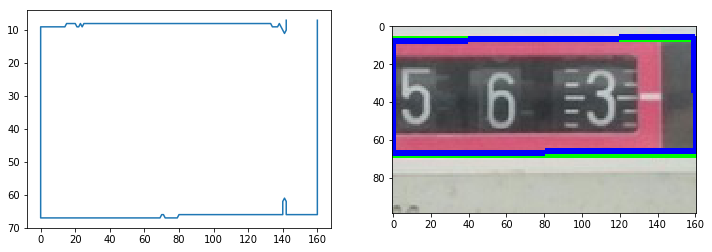

In [481]:
pylab.rcParams['figure.figsize'] = (12, 4)
n = contour.shape[0]
x, y, w, h = cv2.boundingRect(contour)

rect_image = flag_image.copy()
rect_image = cv2.rectangle(rect_image, (x,y), (x+w,y+h), (0,255,0), 2)
rect = cv2.minAreaRect(contour)

box = np.int0(cv2.boxPoints(rect))
rect_image = cv2.drawContours(rect_image, [box], 0, (0,0,255), 2)

plt.figure(1)
plt.subplot(121)
plt.plot(contour.reshape(n, 2)[:, 0], contour.reshape(n, 2)[:, 1])
plt.gca().invert_yaxis()

plt.subplot(122)
plt.imshow(rect_image);

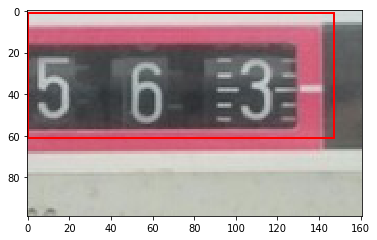

In [482]:
pylab.rcParams['figure.figsize'] = (6, 4)
rect_edges = cv2.boundingRect(edges)
fig, ax = plt.subplots(1)
ax.imshow(flag_image)
rect_line = patches.Rectangle((rect_edges[0], rect_edges[1]), rect_edges[2], rect_edges[3],
                               linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect_line);

In [659]:
def get_symbols(file_name):
    img = scipy.ndimage.imread(file_name, mode='RGB')
    
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, img_thresh = cv2.threshold(img_gray, 100, 200, cv2.THRESH_BINARY_INV)
    im_gray = cv2.GaussianBlur(img_thresh, (7, 7), 0)
    
    img_edges = cv2.Canny(im_gray, 100, 200)
    rectangle = cv2.boundingRect(img_edges)
    
    n1, n2, n3, n4 = rectangle[1], rectangle[1]+rectangle[3], rectangle[0], rectangle[0]+rectangle[2]
    if (n2 == 0): n2 = img.shape[0]
    if (n4 == 0): n4 = img.shape[1]
    image_box = img_gray[n1:n2, n3:n4]
    
    image_resize = scipy.misc.imresize(image_box, (32, 32))
    return image_resize

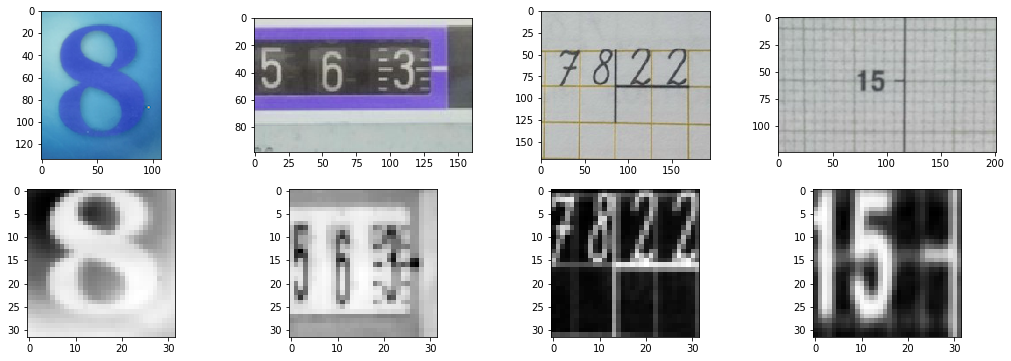

In [662]:
pylab.rcParams['figure.figsize'] = (18, 6)
img1, img2, img3, img4 = 'new/1.png', 'new/10.png', 'new/24.png',  'new/22.png'
plt.figure(1)

plt.subplot(241)
plt.imshow(cv2.imread(img1))
plt.subplot(242)
plt.imshow(cv2.imread(img2))
plt.subplot(243)
plt.imshow(cv2.imread(img3))
plt.subplot(244)
plt.imshow(cv2.imread(img4))

plt.subplot(245)
plt.imshow(get_symbols(img1), cmap=cm.Greys)
plt.subplot(246)
plt.imshow(get_symbols(img2), cmap=cm.Greys)
plt.subplot(247)
plt.imshow(get_symbols(img3), cmap=cm.Greys)
plt.subplot(248)
plt.imshow(get_symbols(img4), cmap=cm.Greys);

## 3. Detection

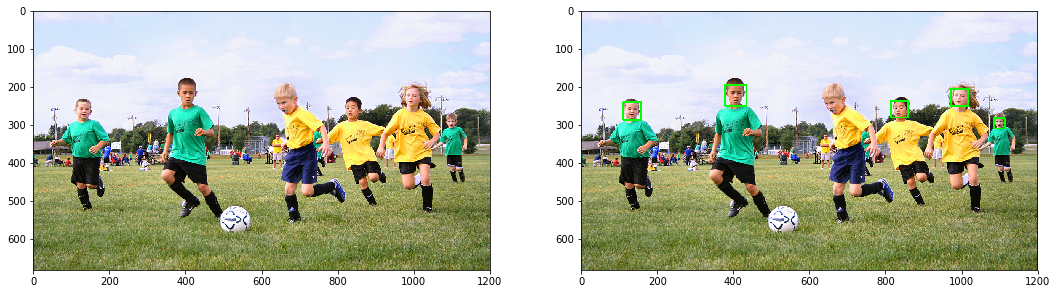

In [743]:
# https://github.com/handee/opencv-gettingstarted/blob/master/haarcascade_frontalface_default.xml
# https://upload.wikimedia.org/wikipedia/commons/thumb/9/92/Youth-soccer-indiana.jpg/1200px-Youth-soccer-indiana.jpg
pylab.rcParams['figure.figsize'] = (18, 6)

sport_image = cv2.imread('sport.jpg')
gray_sport_image = cv2.cvtColor(sport_image, cv2.COLOR_BGR2GRAY)
face_image = sport_image.copy()

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray_sport_image, 1.095, 6)
for (x,y,w,h) in faces:
     cv2.rectangle(face_image, (x,y), (x+w,y+h), (0,255,0), 3)

plt.figure(1)
plt.subplot(121)
plt.imshow(cv2.cvtColor(sport_image, cv2.COLOR_BGR2RGB))

plt.subplot(122)
plt.imshow(cv2.cvtColor(face_image, cv2.COLOR_BGR2RGB));